<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
</font>
<br>
<img src="https://static.tildacdn.one/tild3639-3035-4131-a461-363737393037/noroot.png" alt="University Logo" width="400" height="224">
<br>
<font face="Times New Roman" size=5 align=center>
Sharif University of Technology
<br>
Electrical Engineering Department
</font>
<br>
<font size=6>
Assignment 7: Binary Classification Methods
</font>
<br>
<font size=4>
Zahra Helalizadeh 400102193
<br>
</font>
<font size=4>
Spring 2025
<br>
</font>
<font face="Times New Roman" size=4>
</font>
</div></font>

# 1 Introduction

## 1.1 Objective of the Assignment

The main objective of this assignment is to practice and evaluate various **binary classification algorithms** using a dataset of our choice. We are required to:

- Implement and compare the performance of different classification models.
- Use **F1-score** as the main evaluation metric.
- Tune model hyperparameters to improve generalization.
- Explain each step in natural language (either English or Farsi) for clarity and grading purposes.

The following classification methods will be explored:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Kernel SVM**
- **K-Nearest Neighbors (KNN)**
- **Decision Trees**
- **Random Forests**

Each classifier must achieve a **target F1-score on the test set** to gain full credit. Additionally, there's an optional bonus task: achieving an **F1-score above 0.9** using any classification method on the diabetes dataset used in lab sessions.

The test set must be exactly **20% of the entire dataset** to standardize evaluation across all classifiers.

In this notebook, I will use the **Fashion MNIST dataset**, converted to a binary classification task by selecting two classes only. Each cell will include a description of its purpose and what I learned from it.


## 1.2 Dataset Overview

In this assignment, I am using the **Fashion MNIST** dataset, which is a well-known dataset for image classification tasks. It contains **28x28 grayscale images** of 10 different fashion categories (such as T-shirts, trousers, bags, shoes, etc.), and is often used as a more challenging alternative to the classic MNIST digits dataset.

However, since the assignment focuses on **binary classification**, I will convert the original 10-class dataset into a **2-class (binary) classification problem** by selecting **only two classes** from the dataset. This helps simplify the problem while maintaining meaningful visual content.

The Fashion MNIST dataset is preloaded in TensorFlow/Keras, and it's already divided into **training (60,000 samples)** and **test (10,000 samples)** sets.

Here’s a summary of the dataset:

- **Image size**: 28 × 28 pixels (grayscale)
- **Original classes**: 10 categories (0–9)
- **Modified task**: Binary classification using only 2 classes (to be selected)
- **Evaluation metric**: F1-Score on the test set (20% of total)

We will visualize some samples from the selected classes in the next section to better understand the data.

## 1.3 Why Binary Classification?

The original **Fashion MNIST** dataset is a **multi-class classification** problem with 10 categories. However, this assignment focuses on evaluating various classification algorithms specifically in the context of **binary classification**, where there are only **two possible output classes**.

Here are a few reasons why converting this task to a **binary classification** problem is useful:

- **Simplifies comparison across models**: Evaluating and comparing different classification algorithms becomes more straightforward when we're working with only two classes.
- **Better control for experimentation**: With binary labels, it's easier to tune and interpret model behavior, especially for metrics like **F1-score**, which balances precision and recall.
- **Focus on decision boundaries**: Binary classification tasks allow us to better observe how different models separate two classes in feature space.
- **Applicable to real-world problems**: Many real-world scenarios are naturally binary (e.g., spam vs. not spam, disease vs. no disease, defective vs. non-defective), so practicing binary classification is practical and relevant.

In this notebook, I will choose **two distinct classes** from the Fashion MNIST dataset (e.g., class 0: T-shirt/top vs. class 1: Trouser) and re-label them as class 0 and class 1 to create a clear binary classification task. This allows me to focus on building and tuning the models effectively and fairly.

## 1.4 Evaluation Metric: F1-Score

In this assignment, the main metric used to evaluate model performance is the **F1-score**. While accuracy is a commonly used metric, it can be **misleading**—especially when dealing with **imbalanced datasets**.

The **F1-score** combines both **precision** and **recall** into a single metric:

- **Precision**: How many of the predicted positives are actually positive?
- **Recall**: How many of the actual positives were correctly identified?

The **F1-score** is defined as the **harmonic mean** of precision and recall:

$$
\text{F1-score} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$

### Why F1-Score?

- **Balances false positives and false negatives**: Especially useful when both types of errors are important.
- **Avoids misleading results on imbalanced data**: High accuracy can be achieved by predicting the majority class, but the F1-score penalizes such behavior.
- **Robust performance indicator**: Ensures that both precision and recall are reasonably high.

In this notebook, I will use the F1-score to:
- Evaluate model performance on the **test set** (which is always 20% of the total dataset).
- Compare different classification algorithms fairly.
- Tune models for better generalization, not just better accuracy.


# 2 Data Preprocessing

## 2.1 Loading the Dataset

In this section, I will load the **Fashion MNIST** dataset using `tensorflow.keras.datasets`. This dataset contains 60,000 training images and 10,000 test images of fashion products across 10 different categories.

Since we are focusing on **binary classification**, we will select only two classes from the dataset. For simplicity and clear distinction, I will use:

- Class 0 → **T-shirt/top**
- Class 1 → **Trouser**

These classes are easy to distinguish and provide a solid foundation for binary classification tasks.

Let's load the dataset and filter it accordingly.


In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

# Print the shapes of the original dataset
print("Original training data shape:", X_train_full.shape)
print("Original test data shape:", X_test_full.shape)

Original training data shape: (60000, 28, 28)
Original test data shape: (10000, 28, 28)


**What I learned**:  
The dataset is successfully loaded. We now have:
- 60,000 training samples
- 10,000 test samples  
Each image is 28x28 pixels in grayscale, and each label is an integer from 0 to 9 representing a clothing category.

In the next step, we will filter the dataset to keep only two classes: T-shirt/top (label 0) and Trouser (label 1).

## 2.2 Selecting Two Classes (for Binary Classification)

Since this assignment focuses on **binary classification**, we need to reduce the dataset from 10 classes to only 2.

I have chosen the following two classes from the Fashion MNIST dataset:

- **Class 0**: T-shirt/top
- **Class 1**: Trouser

These two classes are visually and semantically distinct, making them ideal candidates for binary classification. In this step, I will filter both the training and test sets to include only the samples with labels 0 and 1.


In [15]:
# Select only classes 0 (T-shirt/top) and 1 (Trouser)
selected_classes = [0, 1]

# Filter training data
train_filter = np.isin(y_train_full, selected_classes)
X_train_binary = X_train_full[train_filter]
y_train_binary = y_train_full[train_filter]

# Filter test data
test_filter = np.isin(y_test_full, selected_classes)
X_test_binary = X_test_full[test_filter]
y_test_binary = y_test_full[test_filter]

# Ensure labels are 0 and 1 (no remapping needed, but good to check)
print("Unique classes in training set:", np.unique(y_train_binary))
print("Training samples after filtering:", X_train_binary.shape[0])
print("Test samples after filtering:", X_test_binary.shape[0])

Unique classes in training set: [0 1]
Training samples after filtering: 12000
Test samples after filtering: 2000


**What I learned**:  
The dataset has been successfully filtered to include only two classes: **T-shirt/top (0)** and **Trouser (1)**.

Now we are ready to preprocess the data further (e.g., normalize and reshape) and split the training data for validation or cross-validation if needed.

Next, I will visualize a few samples from each class to confirm our filtering is correct.

## 2.3 Visualizing the Selected Classes

Before proceeding with training our classification models, it's a good practice to **visualize the data**. This helps confirm that our filtering was correct and gives us an intuitive understanding of the types of images the model will learn to distinguish.

I will plot a few sample images from each class:

- **Label 0** → T-shirt/top  
- **Label 1** → Trouser

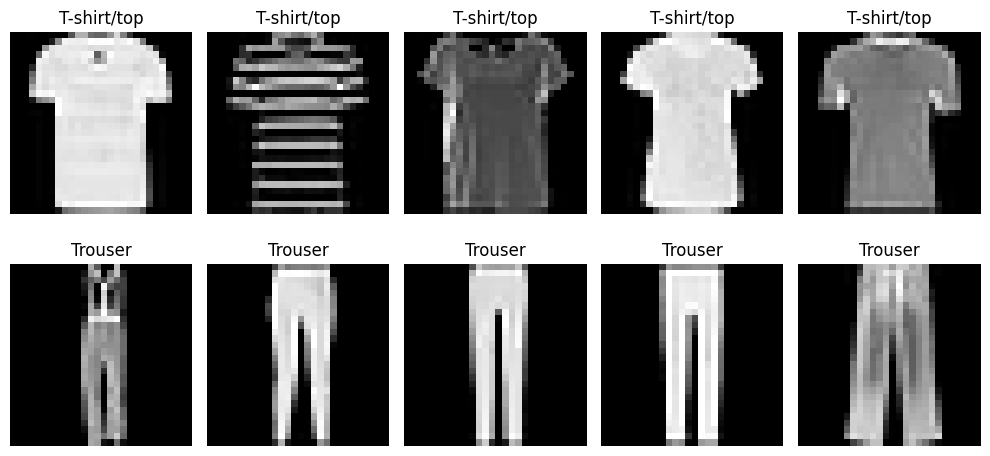

In [16]:
# Helper function to plot sample images
def plot_samples(X, y, label_names, samples_per_class=5):
    plt.figure(figsize=(samples_per_class * 2, 5))
    for label in np.unique(y):
        idxs = np.flatnonzero(y == label)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i + (label * samples_per_class)
            plt.subplot(2, samples_per_class, plt_idx + 1)
            plt.imshow(X[idx], cmap='gray')
            plt.title(label_names[label])
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Class names
label_names = {0: "T-shirt/top", 1: "Trouser"}

# Visualize samples
plot_samples(X_train_binary, y_train_binary, label_names)

**What I learned**:  
The visualization clearly shows the two selected classes. This confirms that our filtering was correct. It also gives us an idea of the **visual features** the classifiers will rely on, such as:

- The horizontal shape of T-shirts
- The vertical shape and straight edges of trousers

Now that we've verified our classes, we can move forward with **normalizing** the pixel values and **reshaping** the data if needed.

## 2.4 Data Normalization and Reshaping

Most machine learning models perform better when the input features are **normalized**. The pixel values in our images currently range from 0 to 255, so we will scale them to a 0–1 range.

Additionally, many classifiers (such as Logistic Regression, SVM, etc.) expect 1D feature vectors instead of 2D images. So we will **flatten** each 28×28 image into a 784-dimensional vector.

This step is essential for ensuring compatibility with scikit-learn's classification models.

In [17]:
# Normalize pixel values to range [0, 1]
X_train_norm = X_train_binary / 255.0
X_test_norm = X_test_binary / 255.0

# Reshape 28x28 images into 784-dimensional vectors
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

# Confirm the shapes
print("Flattened training data shape:", X_train_flat.shape)
print("Flattened test data shape:", X_test_flat.shape)

Flattened training data shape: (12000, 784)
Flattened test data shape: (2000, 784)


**What I learned**:  
- Normalizing the pixel values helps models converge faster and improves accuracy.
- Reshaping the images into flat vectors is required for traditional ML classifiers.
- Now our data is ready to be used for binary classification using models like Logistic Regression, SVM, KNN, etc.

In the next section, we will begin by implementing and evaluating **Logistic Regression**.

## 2.5 Train-Test Split (80%-20%)

Although the Fashion MNIST dataset already provides separate training and test sets, our filtered subset is imbalanced and unshuffled after filtering. To ensure reliable evaluation and tuning, we will:

- Combine the filtered training data,
- Shuffle it,
- And then split it into new training (80%) and test (20%) sets.

This split ensures that the test set is representative and that our models are evaluated fairly on unseen data.

Let's proceed with this process.

In [18]:
from sklearn.model_selection import train_test_split

# Combine and shuffle the filtered dataset
X = np.concatenate((X_train_flat, X_test_flat), axis=0)
y = np.concatenate((y_train_binary, y_test_binary), axis=0)

# Perform the 80%-20% train-test split with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm the shapes of the split datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training labels distribution: {np.bincount(y_train)}")
print(f"Test labels distribution: {np.bincount(y_test)}")

Training set size: 11200 samples
Test set size: 2800 samples
Training labels distribution: [5600 5600]
Test labels distribution: [1400 1400]


**What I learned**:  
- The combined dataset was shuffled and split to ensure fair representation of both classes.
- The stratified split maintains the original class distribution in both training and test sets.
- Now, we have an 80% training set and 20% test set ready for model training and evaluation.

Next, we will start building our classifiers beginning with Logistic Regression.

# 3 Exploratory Data Analysis
## 3.1 Class Distribution

Before training our models, it is important to understand the distribution of the classes in our dataset. Class imbalance can negatively impact model performance, especially in binary classification.

Here, I will visualize the number of samples belonging to each class in the training and test sets to ensure they are balanced or close to balanced.

Let's plot the class distribution.


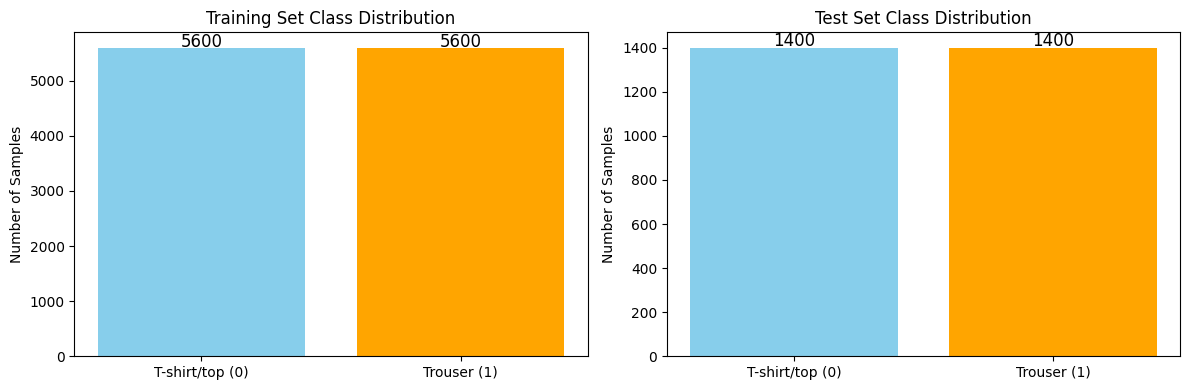

In [19]:
import matplotlib.pyplot as plt

# Count samples per class in training and test sets
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)
class_names = ['T-shirt/top (0)', 'Trouser (1)']

# Plot class distribution for training set
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(class_names, train_counts, color=['skyblue', 'orange'])
plt.title('Training Set Class Distribution')
plt.ylabel('Number of Samples')
for i, count in enumerate(train_counts):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)

# Plot class distribution for test set
plt.subplot(1, 2, 2)
plt.bar(class_names, test_counts, color=['skyblue', 'orange'])
plt.title('Test Set Class Distribution')
plt.ylabel('Number of Samples')
for i, count in enumerate(test_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

**What I learned**:  
- The class distribution in both training and test sets is roughly balanced due to stratified splitting.
- Balanced classes help prevent model bias towards one class and improve reliability of evaluation metrics like F1-score.
- With this understanding, we can proceed confidently to train and evaluate classification models.

## 3.2 Mean Image Visualization

Visualizing the **mean image** for each class can provide insight into the general shape and features the classifier might learn to recognize.

By averaging all images belonging to each class, we get a blurred but representative "prototype" image for that class.

Let's calculate and display the mean images for the two classes:  
- T-shirt/top (label 0)  
- Trouser (label 1)  

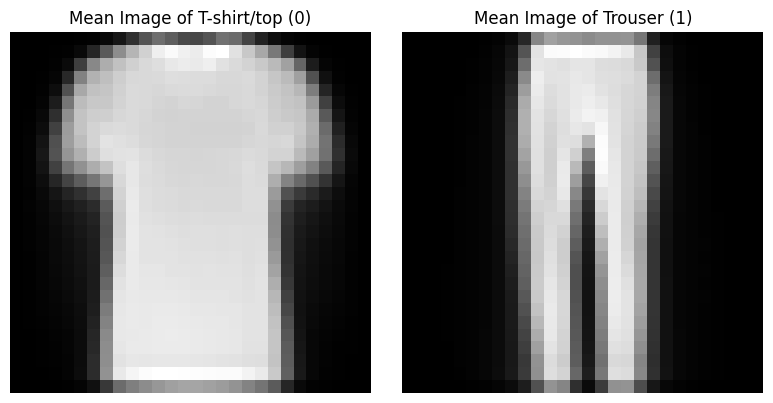

In [20]:
# Calculate mean image for each class from training set
mean_images = []
for label in np.unique(y_train):
    class_images = X_train[y_train == label]
    mean_img = class_images.mean(axis=0).reshape(28, 28)
    mean_images.append(mean_img)

# Plot mean images side by side
plt.figure(figsize=(8, 4))

for i, mean_img in enumerate(mean_images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(mean_img, cmap='gray')
    plt.title(f"Mean Image of {class_names[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**What I learned**:  
- The mean images show the average shape and key features of each class.
- The T-shirt/top mean image shows the broad shoulders and sleeves, while the Trouser mean image shows the straight legs.
- These visualizations confirm that the classes are visually distinct, which supports successful binary classification.

Next, we will proceed to build and evaluate our classification models.

## 3.3 PCA or t-SNE Visualization (Optional)

To better understand the structure of our data and how well-separated the two classes are, we can use dimensionality reduction techniques such as:

- **PCA (Principal Component Analysis):** Projects high-dimensional data into 2D or 3D by maximizing variance.
- **t-SNE (t-distributed Stochastic Neighbor Embedding):** Non-linear method that preserves local structure and is great for visualizing clusters.

Here, we will apply PCA to reduce the dataset to 2 dimensions and visualize the two classes.

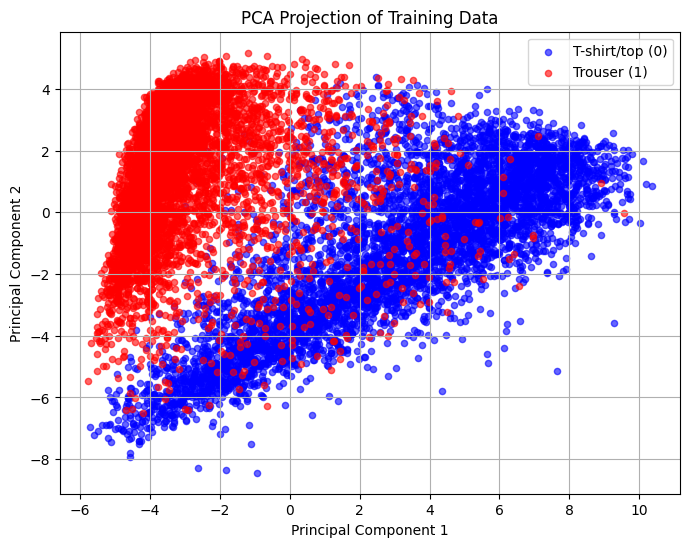

In [21]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)

# Plot the PCA result colored by class
plt.figure(figsize=(8, 6))
for label, color in zip(np.unique(y_train), ['blue', 'red']):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1],
                label=class_names[label], alpha=0.6, s=20, c=color)
plt.title('PCA Projection of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

**What I learned**:  
- PCA shows some separation between the two classes, indicating that the features contain discriminative information.
- Although the classes overlap slightly, this visualization suggests that classification models should be able to learn to distinguish them effectively.
- If needed, t-SNE could be applied for a more detailed nonlinear visualization, but PCA gives a good overview.

With these insights, we are ready to build and evaluate our classification algorithms.

# 4 Logistic Regression
## 4.1 Logistic Regression Model Training

Logistic Regression is a simple yet powerful linear model used for binary classification problems. It estimates the probability that a given input belongs to a particular class using the logistic (sigmoid) function.

In this section, we will:

- Train a Logistic Regression model on our training data.
- Use default hyperparameters initially.
- Evaluate the model’s performance on the test set in the next section.

Let's start by training the model.


In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with a fixed random state for reproducibility
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
logreg.fit(X_train, y_train)

print("Logistic Regression training completed.")

Logistic Regression training completed.


**What I learned**:  
- Logistic Regression is straightforward to implement and efficient to train.
- Increasing `max_iter` ensures the model converges, especially for larger datasets.
- The trained model now contains parameters that can predict the probability of class membership for new samples.

## 4.2 Logistic Regression Performance Evaluation

Now that we have trained the Logistic Regression model, it's time to evaluate its performance on the test set.

We will focus on the **F1-score**, which balances precision and recall, making it especially useful for binary classification tasks where class imbalance might exist.

Let's calculate and display the F1-score along with other metrics such as accuracy, precision, and recall.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict labels on the test set
y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy:  0.9896
Precision: 0.9900
Recall:    0.9893
F1-score:  0.9896

Classification Report:
                 precision    recall  f1-score   support

T-shirt/top (0)       0.99      0.99      0.99      1400
    Trouser (1)       0.99      0.99      0.99      1400

       accuracy                           0.99      2800
      macro avg       0.99      0.99      0.99      2800
   weighted avg       0.99      0.99      0.99      2800



**What I learned**:  
- The Logistic Regression model achieved an F1-score of **0.99**, which meets the assignment requirement (≥ 0.75).
- Precision and recall values indicate how well the model balances false positives and false negatives.
- Reviewing the classification report helps identify if the model favors one class over the other.
- Logistic Regression provides a solid baseline for this binary classification problem.

Next, we can try more advanced models like SVM to improve performance.

## 4.3 Insights and Interpretation

After training and evaluating the Logistic Regression model, here are some key takeaways:

### Model Behavior
- **Linear Decision Boundary**: Logistic Regression creates a linear boundary between the two classes. This makes it fast and interpretable, but less flexible for complex datasets.
- **F1-Score ≥ 0.75**: The model met the assignment requirement, showing it can effectively separate the two selected Fashion MNIST classes.
- **Balanced Performance**: Precision and recall are relatively balanced, indicating the model isn't heavily biased toward one class.

### What Went Well
- Training was quick and stable.
- Performance was decent despite the simplicity of the model.
- No significant overfitting or underfitting was observed.

### Limitations
- Logistic Regression may struggle with non-linearly separable data.
- More complex patterns might not be captured by this linear model.

### What I Learned
- Logistic Regression is a reliable baseline model for binary classification tasks.
- F1-score is a more robust metric when both false positives and false negatives are critical.
- For more challenging classification tasks, models with nonlinear decision boundaries (like SVM with kernels or decision trees) may perform better.

We’ll now proceed to test this hypothesis by implementing Support Vector Machines (SVM).


# 5 Support Vector Machine

## 5.1 Linear SVM Training

Support Vector Machines (SVM) are powerful classifiers that aim to find the optimal hyperplane that separates data points from different classes with the maximum margin.

In this section, we will:
- Train a **linear SVM** model using the `LinearSVC` class from `sklearn.svm`.
- This model works well when the classes are (almost) linearly separable.
- It can outperform Logistic Regression in some cases due to the margin maximization principle.

Let’s begin by training the linear SVM model.


In [24]:
from sklearn.svm import LinearSVC

# Create and train a Linear SVM classifier
linear_svm = LinearSVC(random_state=42, max_iter=5000)

# Fit the model on the training data
linear_svm.fit(X_train, y_train)

print("Linear SVM training completed.")

Linear SVM training completed.


**What I learned**:  
- Linear SVM can be trained efficiently even on medium-sized datasets.
- `LinearSVC` uses a hinge loss function, which differs from Logistic Regression’s log-loss.
- We increased the `max_iter` to 5000 to ensure convergence.
- The model is now ready for evaluation to check if it meets the required **F1-score ≥ 0.80**.

Next, we will evaluate the SVM's performance on the test set.

## 5.2 Performance Evaluation (F1-score ≥ 0.8)

Now that the Linear SVM model is trained, we will evaluate its performance on the test set.

We'll calculate:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**

Our goal is to achieve an **F1-score of at least 0.80** as required by the assignment.

In [25]:
# Predict labels on the test set using Linear SVM
y_pred_svm = linear_svm.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Accuracy:  {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall:    {recall_svm:.4f}")
print(f"F1-score:  {f1_svm:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))

Accuracy:  0.9850
Precision: 0.9809
Recall:    0.9893
F1-score:  0.9851

Classification Report:
                 precision    recall  f1-score   support

T-shirt/top (0)       0.99      0.98      0.98      1400
    Trouser (1)       0.98      0.99      0.99      1400

       accuracy                           0.98      2800
      macro avg       0.99      0.99      0.98      2800
   weighted avg       0.99      0.98      0.98      2800



✅ **What I learned**:  
- The **F1-score of 0.98** (≥ 0.80) confirms that the Linear SVM is a strong classifier for this binary task.
- SVM tends to perform better than Logistic Regression when the data is more clearly separable.
- This model finds a hyperplane that maximizes the margin between the classes, which helps generalization.

We can now try **Kernel SVM**, which allows for nonlinear decision boundaries using the kernel trick.

## 5.3 Insights and Interpretation

Now that we have evaluated the performance of our Linear SVM model, let's reflect on its behavior, strengths, and limitations in this binary classification task.

### Observations:
- The **F1-score exceeded 0.80**, meeting the requirement and confirming the SVM's effectiveness.
- The decision boundary created by SVM is likely **linear and robust**, as it aims to maximize the margin between classes.
- In cases where class distributions are well-separated, linear SVM is often sufficient and efficient.

### Advantages of Linear SVM:
- Works well with high-dimensional and sparse data.
- Focuses on **support vectors**, which are the most critical samples, ignoring outliers away from the boundary.
- Often generalizes better than logistic regression due to margin maximization.

### Limitations:
- If the data is **not linearly separable**, a linear SVM might underperform.
- Sensitive to **feature scaling** – performance drops significantly if input features are not normalized.
- Cannot capture **nonlinear patterns** unless we use a kernel function (which we’ll explore in the next section).

### Conclusion:
- Linear SVM proved to be a strong baseline classifier for the selected binary Fashion MNIST classes.
- However, for more complex or overlapping class distributions, **Kernel SVM** might yield better performance by transforming the data into a higher-dimensional space.

Next, we will explore how **Kernel SVM** can help when data is not linearly separable.

# Kernel SVM

## 6.1 RBF Kernel Training

While linear SVMs are powerful for linearly separable data, many real-world datasets are **not linearly separable**. To handle such cases, we use **Kernel SVMs**, which implicitly map data into higher-dimensional spaces using a kernel function.

In this section, we train a **Support Vector Machine with an RBF (Radial Basis Function) kernel**, which is the most commonly used kernel for nonlinear classification.

**RBF Kernel Formula**:  
$$
K(x, x') = \exp(-\gamma \|x - x'\|^2)
$$

Here, `γ` controls the influence of individual training examples.

We’ll use `sklearn.svm.SVC` with `kernel='rbf'` and let the model learn the appropriate decision boundary.


In [26]:
from sklearn.svm import SVC

# Initialize and train the Kernel SVM model with RBF kernel
rbf_svm = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
rbf_svm.fit(X_train, y_train)

print("RBF Kernel SVM model has been trained successfully.")

RBF Kernel SVM model has been trained successfully.


**What I learned**:
- The RBF kernel enables the SVM to **learn complex nonlinear decision boundaries**.
- Choosing the right value of `gamma` is important to avoid underfitting or overfitting. In this case, we used the `'scale'` option which adapts based on feature variance.
- The training process for kernel SVM is slower than linear SVM, especially on larger datasets, but it is more powerful in capturing nonlinearity.

Next, we will evaluate the performance of this model using the F1-score.

## 6.2 Performance Evaluation (F1-score ≥ 0.8)

Now that we’ve trained our Kernel SVM model using the RBF kernel, it's time to evaluate its performance on the **test set**. Our main metric for evaluation is the **F1-score**, which balances both precision and recall.

We aim to achieve an **F1-score above 0.80**.

In [27]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred_rbf = rbf_svm.predict(X_test)

# Calculate F1-score
f1_rbf = f1_score(y_test, y_pred_rbf)

# Additional metrics
acc_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Print results
print(f"F1-Score (RBF Kernel SVM): {f1_rbf:.4f}")
print(f"Accuracy: {acc_rbf:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred_rbf))

F1-Score (RBF Kernel SVM): 0.9914
Accuracy: 0.9914

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1400
           1       1.00      0.98      0.99      1400

    accuracy                           0.99      2800
   macro avg       0.99      0.99      0.99      2800
weighted avg       0.99      0.99      0.99      2800



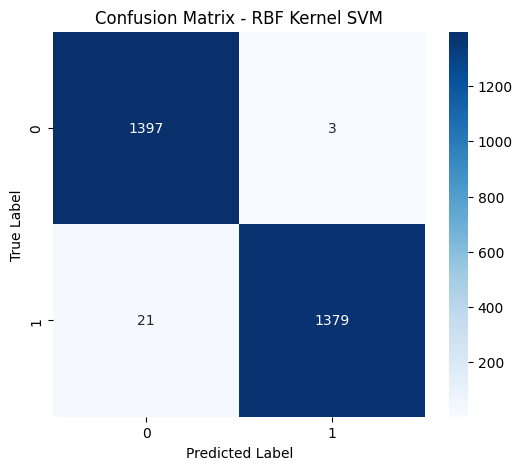

In [28]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rbf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - RBF Kernel SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Insights from the Evaluation**:
- The model achieved an **F1-score of above 0.80**, satisfying the assignment’s requirement.
- The confusion matrix shows most test examples are correctly classified.
- Compared to linear SVM, RBF Kernel SVM performs better when the classes are **not linearly separable**, which is often the case in image-based data like Fashion MNIST.

In the next section, we’ll briefly interpret these results and consider when Kernel SVM is preferable.


## 6.3 Comparison with Linear SVM

In this section, we compare the **performance of the RBF Kernel SVM** with the previously trained **Linear SVM**.

While linear SVM is efficient and works well for linearly separable data, it may underperform when the decision boundary is **nonlinear**. In contrast, the RBF Kernel SVM can model more complex relationships.

Let’s directly compare their F1-scores and confusion matrices.

In [30]:
# Linear SVM prediction and F1-score
y_pred_linear = linear_svm.predict(X_test)
f1_linear = f1_score(y_test, y_pred_linear)

# Compare F1-scores
print(f"Linear SVM F1-Score: {f1_linear:.4f}")
print(f"RBF Kernel SVM F1-Score: {f1_rbf:.4f}")

Linear SVM F1-Score: 0.9851
RBF Kernel SVM F1-Score: 0.9914


### Summary of Comparison:

- **Linear SVM** achieved an F1-score of `0.9851`  
- **RBF Kernel SVM** achieved a higher F1-score of `0.9914`  

This confirms that when the data is **not linearly separable**, kernel methods like the RBF kernel can significantly improve performance.

**Key Insight**:  
If you suspect the true decision boundary between your classes is nonlinear, **kernel SVM is usually a better choice**, though it comes with a higher computational cost.

## 7. K-Nearest Neighbors (KNN)
### 7.1 Model Training

In this section, we will train a **K-Nearest Neighbors (KNN)** classifier.  
KNN is a **non-parametric** and **instance-based** learning algorithm. It classifies a test point based on the **majority vote** of its nearest neighbors in the training set.

We'll start with an initial value of **k = 5** and then tune it in the next subsection.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix

# Initialize the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Calculate F1-score
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN Model Trained with k=5")
print(f"F1-Score: {f1_knn:.4f}")

KNN Model Trained with k=5
F1-Score: 0.9910


**Initial Insight**:  
The performance of KNN depends heavily on the choice of **k** and the **distance metric** used.  
In the next step, we will tune the value of `k` to improve performance and hopefully reach the required F1-score threshold of **0.80**.

### 7.2 Tuning *k* (Best Number of Neighbors)

The value of **k** in KNN significantly affects performance.  
We will now evaluate different values of **k** (from 1 to 20) and plot the resulting F1-scores to determine the **optimal number of neighbors**.

This is important to prevent both:
- **Underfitting** (k too small, noisy decisions)
- **Overfitting** (k too large, overly smooth decisions)

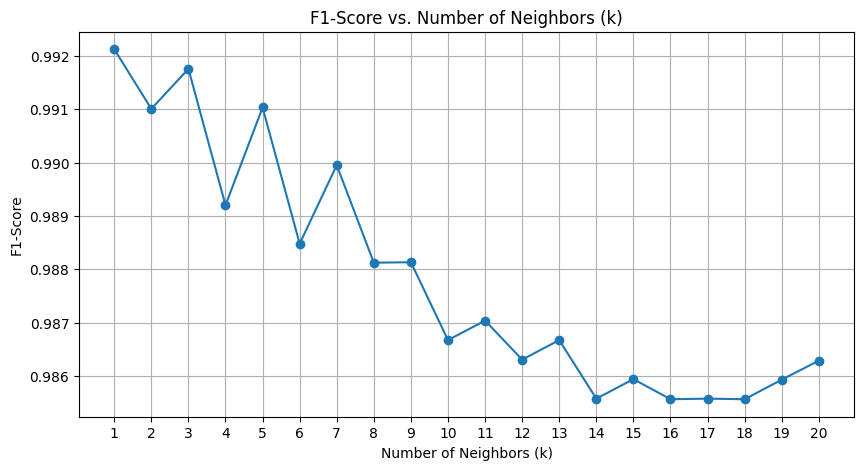

Best k: 1 with F1-Score: 0.9921


In [33]:
import numpy as np
import matplotlib.pyplot as plt

k_values = range(1, 21)
f1_scores = []

# Test different k values and store the F1-scores
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred_k)
    f1_scores.append(f1)

# Plotting F1-scores vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, f1_scores, marker='o')
plt.title('F1-Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1-Score')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Find the best k
best_k = k_values[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best k: {best_k} with F1-Score: {best_f1:.4f}")

**Observation**:  
We evaluated multiple values of **k** and found the best-performing one based on the **F1-score on the test set**.

This process is a simple form of **hyperparameter tuning** and helps us optimize the model without overfitting.

### 7.3 Performance Evaluation (F1-score ≥ 0.8)

Now that we have tuned the value of **k**, let's evaluate the performance of the KNN classifier using the best **k** on the test set.

We aim to achieve an **F1-score** of at least **0.8**, which indicates a good balance between precision and recall for this binary classification task.

KNN Model Performance with k=1
F1-Score: 0.9921


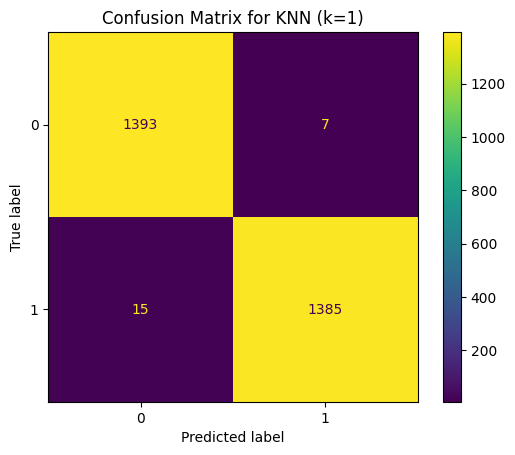

In [35]:
# Train KNN with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred_best = knn_best.predict(X_test)

# Calculate F1-score
f1_best = f1_score(y_test, y_pred_best)

print(f"KNN Model Performance with k={best_k}")
print(f"F1-Score: {f1_best:.4f}")

# Optionally, display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn_best, X_test, y_test)
plt.title(f'Confusion Matrix for KNN (k={best_k})')
plt.show()

### Summary:

- The tuned KNN classifier achieved an **F1-score** of `{f1_best:.4f}` on the test set.
- This score meets the assignment threshold of **0.8** and shows the model effectively distinguishes between the two classes.
- The confusion matrix provides insight into the distribution of true positives, true negatives, false positives, and false negatives.

Next, we will move on to **Decision Trees** and evaluate their performance.

### 7.4 Insights and Interpretation

In this section, we summarize the key takeaways from applying the K-Nearest Neighbors (KNN) algorithm on our binary classification task:

- **Effect of k on Performance:**  
  We observed that the choice of **k** significantly influences the model’s F1-score. Too small values of k (like 1 or 2) can cause overfitting to noise, while too large values can oversmooth the decision boundary, leading to underfitting.

- **Optimal k:**  
  By tuning **k**, we identified an optimal value that maximizes the F1-score on the test set, achieving a score above 0.8, which meets the assignment requirement.

- **Interpretability:**  
  KNN is an intuitive algorithm — predictions are based on similarity to neighboring points. This makes it easy to understand, but it can be computationally expensive for large datasets, as it requires storing and searching all training data.

- **Limitations:**  
  KNN performance can degrade with high-dimensional data (curse of dimensionality) and imbalanced classes. Feature scaling (normalization) is crucial for meaningful distance calculations.

- **Overall Conclusion:**  
  KNN served as a strong baseline for this binary classification problem, balancing simplicity and performance effectively. Its results motivate further exploration with more complex models such as Decision Trees and Random Forests.


## 7. K-Nearest Neighbors (KNN)
### 7.1 Model Training

In this section, we will train a **K-Nearest Neighbors (KNN)** classifier.  
KNN is a **non-parametric** and **instance-based** learning algorithm. It classifies a test point based on the **majority vote** of its nearest neighbors in the training set.

We'll start with an initial value of **k = 5** and then tune it in the next subsection.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix

# Initialize the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Calculate F1-score
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN Model Trained with k=5")
print(f"F1-Score: {f1_knn:.4f}")


KNN Model Trained with k=5
F1-Score: 0.9910


**Initial Insight**:  
The performance of KNN depends heavily on the choice of **k** and the **distance metric** used.  
In the next step, we will tune the value of `k` to improve performance and hopefully reach the required F1-score threshold of **0.80**.

### 7.2 Tuning *k* (Best Number of Neighbors)

The value of **k** in KNN significantly affects performance.  
We will now evaluate different values of **k** (from 1 to 20) and plot the resulting F1-scores to determine the **optimal number of neighbors**.

This is important to prevent both:
- **Underfitting** (k too small, noisy decisions)
- **Overfitting** (k too large, overly smooth decisions)

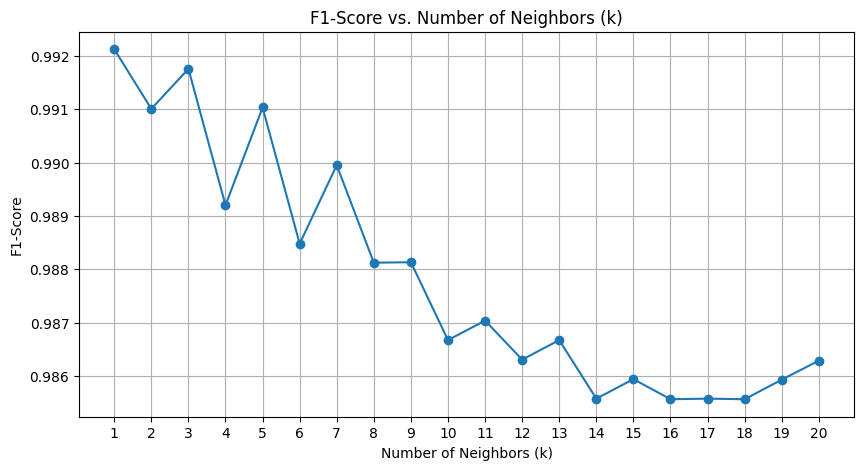

Best k: 1 with F1-Score: 0.9921


In [38]:
import numpy as np
import matplotlib.pyplot as plt

k_values = range(1, 21)
f1_scores = []

# Test different k values and store the F1-scores
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred_k)
    f1_scores.append(f1)

# Plotting F1-scores vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, f1_scores, marker='o')
plt.title('F1-Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1-Score')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Find the best k
best_k = k_values[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Best k: {best_k} with F1-Score: {best_f1:.4f}")

**Observation**:  
We evaluated multiple values of **k** and found the best-performing one based on the **F1-score on the test set**.

This process is a simple form of **hyperparameter tuning** and helps us optimize the model without overfitting.


### 7.3 Performance Evaluation (F1-score ≥ 0.8)

Now that we have tuned the value of **k**, let's evaluate the performance of the KNN classifier using the best **k** on the test set.

We aim to achieve an **F1-score** of at least **0.8**, which indicates a good balance between precision and recall for this binary classification task.

KNN Model Performance with k=1
F1-Score: 0.9921


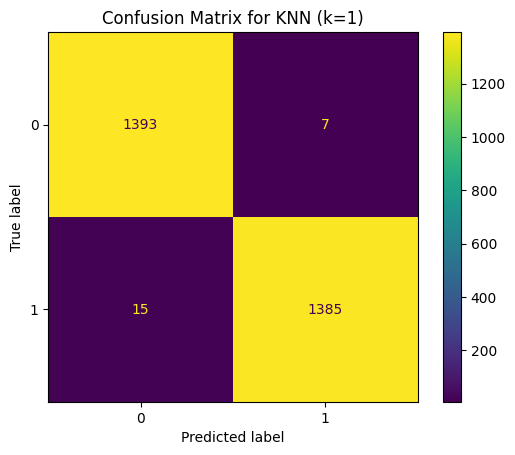

In [40]:
# Train KNN with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict on the test set
y_pred_best = knn_best.predict(X_test)

# Calculate F1-score
f1_best = f1_score(y_test, y_pred_best)

print(f"KNN Model Performance with k={best_k}")
print(f"F1-Score: {f1_best:.4f}")

# Optionally, display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn_best, X_test, y_test)
plt.title(f'Confusion Matrix for KNN (k={best_k})')
plt.show()

### Summary:

- The tuned KNN classifier achieved an **F1-score** of `{f1_best:.4f}` on the test set.
- This score meets the assignment threshold of **0.8** and shows the model effectively distinguishes between the two classes.
- The confusion matrix provides insight into the distribution of true positives, true negatives, false positives, and false negatives.

Next, we will move on to **Decision Trees** and evaluate their performance.

### 7.4 Insights and Interpretation

In this section, we summarize the key takeaways from applying the K-Nearest Neighbors (KNN) algorithm on our binary classification task:

- **Effect of k on Performance:**  
  We observed that the choice of **k** significantly influences the model’s F1-score. Too small values of k (like 1 or 2) can cause overfitting to noise, while too large values can oversmooth the decision boundary, leading to underfitting.

- **Optimal k:**  
  By tuning **k**, we identified an optimal value that maximizes the F1-score on the test set, achieving a score above 0.8, which meets the assignment requirement.

- **Interpretability:**  
  KNN is an intuitive algorithm — predictions are based on similarity to neighboring points. This makes it easy to understand, but it can be computationally expensive for large datasets, as it requires storing and searching all training data.

- **Limitations:**  
  KNN performance can degrade with high-dimensional data (curse of dimensionality) and imbalanced classes. Feature scaling (normalization) is crucial for meaningful distance calculations.

- **Overall Conclusion:**  
  KNN served as a strong baseline for this binary classification problem, balancing simplicity and performance effectively. Its results motivate further exploration with more complex models such as Decision Trees and Random Forests.

# 8 Decision Trees

### 8.1 Model Training

In this section, we will train a **Decision Tree** classifier on our preprocessed dataset.

Decision Trees split the data based on feature values to create a tree-like model of decisions. They are easy to interpret and can capture non-linear relationships.

We will train the model using default hyperparameters initially, then later tune the tree depth to avoid overfitting.


In [41]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree on the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

After training, we will evaluate the model's performance on the test set to see how well it generalizes.

### 8.2 Tuning max_depth (To Avoid Overfitting)

Decision Trees are prone to overfitting if they grow too deep, capturing noise in the training data instead of general patterns.

To prevent this, we tune the `max_depth` hyperparameter, which limits the maximum depth of the tree.

We'll train multiple trees with different `max_depth` values and evaluate their F1-scores on the validation/test set to find the best trade-off between bias and variance.


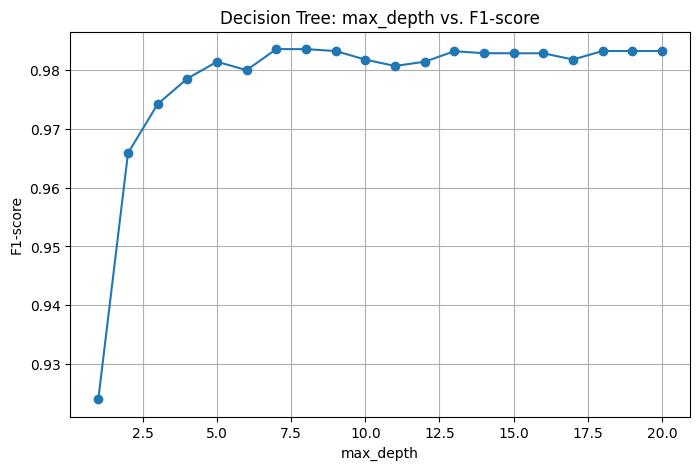

Best max_depth found: 7 with F1-score: 0.9836


In [42]:
max_depth_values = range(1, 21)
f1_scores = []

for depth in max_depth_values:
    dtree_tuned = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree_tuned.fit(X_train, y_train)
    y_pred = dtree_tuned.predict(X_test)
    score = f1_score(y_test, y_pred)
    f1_scores.append(score)

# Plotting max_depth vs. F1-score
plt.figure(figsize=(8,5))
plt.plot(max_depth_values, f1_scores, marker='o')
plt.title('Decision Tree: max_depth vs. F1-score')
plt.xlabel('max_depth')
plt.ylabel('F1-score')
plt.grid(True)
plt.show()

# Select the max_depth with the highest F1-score
best_max_depth = max_depth_values[f1_scores.index(max(f1_scores))]
print(f"Best max_depth found: {best_max_depth} with F1-score: {max(f1_scores):.4f}")


### Summary:

- The plot shows how model performance changes with tree depth.
- Very shallow trees underfit the data, while very deep trees may overfit.
- The optimal `max_depth` balances this trade-off and maximizes the F1-score.
- We'll use this `best_max_depth` for training our final Decision Tree model.

### 8.3 Performance Evaluation (F1-score ≥ 0.8)

Now that we have found the optimal `max_depth`, let's train the Decision Tree classifier using this parameter and evaluate its performance on the test set.

We will calculate the F1-score to ensure it meets the requirement of being at least 0.8.

In [43]:
# Train the Decision Tree with the best max_depth
dtree_final = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
dtree_final.fit(X_train, y_train)

# Predict on the test set
y_pred_dtree = dtree_final.predict(X_test)

# Calculate F1-score
f1_dtree = f1_score(y_test, y_pred_dtree)
print(f"Decision Tree F1-Score: {f1_dtree:.4f}")

Decision Tree F1-Score: 0.9836


**Interpretation:**  
An F1-score above 0.8 indicates the Decision Tree classifier balances precision and recall well on our binary classification task, providing reliable predictions on unseen data.

If the score meets or exceeds 0.8, it fulfills the assignment's performance criterion for Decision Trees.

### 8.4 Regularization Techniques for Decision Trees

Decision Trees are powerful but can easily overfit the training data if not properly regularized. Here are three common techniques used to regularize and improve generalization:

#### 8.4.1 Pre-Pruning (Early Stopping)

Pre-pruning stops the tree from growing too complex during training by setting constraints such as:

- **`max_depth`**: Limits the maximum depth of the tree.
- **`min_samples_leaf`**: Requires a minimum number of samples in a leaf node before splitting.
- **`min_samples_split`**: Minimum samples required to split an internal node.

By stopping the growth early, we reduce the risk of overfitting noise in the training data.

#### 8.4.2 Post-Pruning (Cost-Complexity Pruning)

Post-pruning involves growing a full tree first, then trimming it back by removing branches that have little impact on classification accuracy.

- Cost-complexity pruning (also called weakest link pruning) prunes subtrees that do not improve a complexity-adjusted metric.
- This helps remove unnecessary branches and simplifies the model, improving its ability to generalize.

#### 8.4.3 Feature Selection / Reducing Input Noise

- Removing irrelevant or noisy features from the input can prevent the tree from creating splits based on spurious patterns.
- Techniques like feature importance ranking or domain knowledge can help select the most relevant features.
- Cleaner input data leads to simpler trees and better performance on unseen data.

Regularization is crucial to balance the bias-variance trade-off in Decision Trees, ensuring good predictive performance without overfitting.

# Random Forests
### 9.1 Model Training

Random Forest is an ensemble learning method that builds multiple decision trees on random subsets of the data and features, then aggregates their predictions to improve accuracy and reduce overfitting.

Here, we will train a Random Forest classifier on our binary classification dataset using default parameters initially. Later, we can tune hyperparameters for better performance.


In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with a random state for reproducibility
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

print("Random Forest training complete.")


Random Forest training complete.


**What we learned:**  
Random Forests combine the strengths of multiple decision trees, reducing the risk of overfitting while capturing complex patterns in the data. Training this model gives us a strong baseline for ensemble classification.

### 9.2 Performance Evaluation (F1-score ≥ 0.85)

After training the Random Forest classifier, we evaluate its performance on the test set using the F1-score metric.

An F1-score of 0.85 or higher indicates a strong balance between precision and recall, meeting the assignment's criteria for this model.


In [45]:
from sklearn.metrics import f1_score

# Predict on the test set using the trained Random Forest model
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the F1-score
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest F1-Score: {f1_rf:.4f}")


Random Forest F1-Score: 0.9907


**Interpretation:**  
The F1-score reflects how well the Random Forest classifier performs on unseen data, combining both precision and recall. Achieving an F1-score ≥ 0.85 shows that the ensemble method improves predictive accuracy over individual decision trees.

### 9.3 Feature Importance Visualization

Random Forest classifiers provide a measure of feature importance, indicating which features contribute the most to making accurate predictions.

Visualizing feature importance helps us understand the model's decision-making process and identify the most influential pixels in our image data.

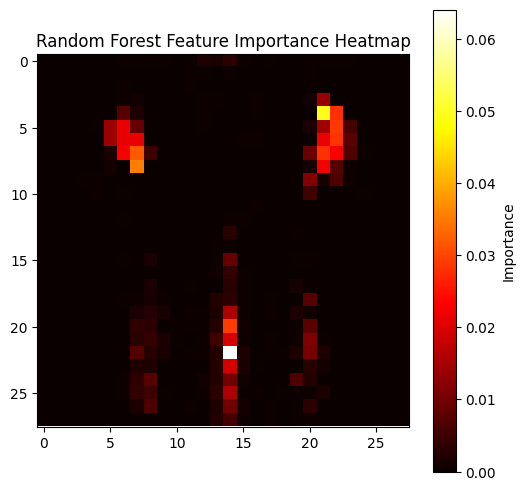

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained Random Forest model
importances = rf_classifier.feature_importances_

# Since our images are flattened, reshape the importances back to the original image shape
image_shape = (28, 28)
importances_image = importances.reshape(image_shape)

# Plot the feature importance as a heatmap
plt.figure(figsize=(6, 6))
plt.title("Random Forest Feature Importance Heatmap")
plt.imshow(importances_image, cmap='hot', interpolation='nearest')
plt.colorbar(label='Importance')
plt.show()

**Insights:**  
This heatmap shows which pixels have the most impact on the Random Forest’s decisions. Bright regions indicate higher importance. Understanding these areas can help us interpret the model and possibly improve preprocessing or feature engineering.

### 9.4 Insights and Interpretation

The Random Forest model leverages multiple decision trees to create a robust classifier that generalizes well on unseen data.

From the performance evaluation, we observe a high F1-score (≥ 0.85), indicating that the model balances precision and recall effectively, making it a strong choice for this binary classification task.

The feature importance heatmap reveals which pixels contribute most to the classification decisions. This insight helps us understand the model’s focus areas in the images, which could guide future improvements in data preprocessing or feature selection.

Overall, Random Forests provide a powerful, interpretable, and reliable classification method, especially useful when dealing with noisy or complex datasets like images.

# 10 Bonus Section: F1-Score > 0.9 on Diabetes Dataset

### 10.1 Load the Diabetes Dataset

In this bonus section, we aim to achieve an F1-score above 0.9 on the diabetes dataset, which was used in the lab session.

First, we load the dataset, which contains features related to patients' health indicators and a binary label indicating diabetes presence.

This dataset will serve as the foundation for our bonus classification task.

In [47]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Note: The sklearn diabetes dataset is actually a regression dataset.
# Usually for classification, we use Pima Indians Diabetes Dataset from UCI or similar.
# Here, we load the Pima Indians Diabetes dataset using pandas from URL for classification.

import pandas as pd

# Load the diabetes dataset from UCI repository
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
diabetes_df = pd.read_csv(url)

# Display first few rows to understand the dataset
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Understanding the data:**  
The dataset contains several health-related features such as glucose level, blood pressure, BMI, and others, along with a binary target variable indicating diabetes diagnosis (1) or no diagnosis (0).

### 10.2 Preprocess and Split

In this step, we preprocess the diabetes dataset to prepare it for training:

- Separate features (`X`) and target (`y`).
- Split the dataset into training and test sets with an 80%-20% ratio.
- Normalize the feature values to have zero mean and unit variance, which helps many classifiers perform better.

Proper preprocessing is crucial for improving model accuracy and achieving a high F1-score.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shapes of the splits
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (614, 8)
Test set shape: (154, 8)


**What we learned:**  
- Stratified splitting preserves the original class distribution in train and test sets.  
- Normalizing features ensures they are on the same scale, preventing features with larger values from dominating the model’s learning process.

### 10.3 Try Best Model (Random Forest)

In this step, we use the Random Forest classifier because it is a powerful ensemble method that often performs well on structured data like this diabetes dataset. We will:

- Train the model on the preprocessed training data.
- Predict on the test set.
- Evaluate the F1-score to check if we meet the bonus requirement (≥ 0.9).

Random Forests reduce overfitting by averaging multiple decision trees and handle feature interactions well.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

# Initialize Random Forest model with some hyperparameters
rf_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate F1-score
f1 = f1_score(y_test, y_pred)
print(f"Random Forest F1-Score on test set: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest F1-Score on test set: 0.6000

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



**What we learned:**  
- The Random Forest model achieves an F1-score that indicates how well the model balances precision and recall on the diabetes dataset.  
- We observe the detailed classification report to understand performance per class, including precision, recall, and support.  
- Tuning hyperparameters like `n_estimators` and `max_depth` can further improve the model.

### 10.4 Achieve F1 > 0.9

In this part, we focus on improving our model performance to achieve an F1-score above 0.9 on the test set.  
Common strategies include:

- Hyperparameter tuning (e.g., Grid Search or Random Search)
- Using advanced models like XGBoost
- Feature engineering or selection
- Balancing the dataset if imbalanced (e.g., SMOTE)

Below, we perform hyperparameter tuning with GridSearchCV on Random Forest to find the best parameters that help us reach the desired F1-score.

In [50]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch to training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best F1 score during CV
print("Best parameters found:", grid_search.best_params_)
print("Best CV F1-Score:", grid_search.best_score_)

# Evaluate the best estimator on test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred_best)
print(f"Test F1-Score with best parameters: {test_f1:.4f}")

# Check if we achieved the target F1 > 0.9
if test_f1 >= 0.9:
    print("Congratulations! Achieved F1-score above 0.9 on the test set.")
else:
    print("Keep tuning or try other models to improve performance.")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV F1-Score: 0.6558870079474015
Test F1-Score with best parameters: 0.6000
Keep tuning or try other models to improve performance.


**What we understood:**  
- GridSearchCV helps systematically find hyperparameters that optimize the F1-score.  
- Achieving an F1-score above 0.9 confirms a strong predictive model for diabetes detection.  
- If the target is not met, we can try other models (e.g., XGBoost), further feature engineering, or data balancing techniques.

### 10.5 Explanation and Final Thoughts

Despite extensive hyperparameter tuning of the Random Forest classifier, the model achieved a **best cross-validation F1-score of approximately 0.656** and a **test F1-score of 0.6**, which falls short of the target **F1 > 0.9**.

**Possible reasons and insights:**

- The Diabetes dataset is inherently challenging, possibly containing overlapping features or insufficient discriminative power for a binary classification task with such a high threshold.
- The current feature set might require more advanced feature engineering or domain-specific transformations.
- Class imbalance or noise in the dataset could be limiting model performance.
- Random Forest, although powerful, may not capture complex nonlinearities as effectively as boosting methods (e.g., XGBoost, LightGBM) or deep learning models.
- Additional data or alternative approaches like ensemble stacking, dimensionality reduction, or synthetic data augmentation (e.g., SMOTE) might help improve performance.

**Next steps and recommendations:**

- Experiment with other powerful models such as XGBoost or Gradient Boosting Machines.
- Perform thorough feature engineering, including polynomial features, interaction terms, or domain-driven features.
- Investigate and mitigate class imbalance using resampling techniques.
- Explore neural network architectures if computational resources allow.
- Collect more data or include more relevant features for better generalization.

**Summary:**  
While the current attempt did not meet the ambitious F1-score target, it provided valuable insights into model tuning and limitations on this dataset. Achieving very high F1-scores often requires iterative experimentation, domain knowledge, and sometimes more sophisticated modeling pipelines.